In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from numpy import polyfit, poly1d

# Cryptocurrency Dataset Features
```
date : time of observation
price: price at observation point
market_cap : market capitalization in USD (how much bitcoin/doge are actually worth)
total_volume : volume of transactions on the given day
```
(from https://www.coingecko.com/en/coins/dogecoin/historical_data/usd and https://www.coingecko.com/en/coins/bitcoin/historical_data/usd#panel)

## Bitcoin Dataset

In [2]:
BTC = pd.read_csv (r'btc-usd-max.csv')
BTC.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [3]:
# view range of bitcoin data
BTC.tail()

,snapped_at,price,market_cap,total_volume
2953,2021-05-31 00:00:00 UTC,35714.752020,6.686643e+11,3.065027e+10
2954,2021-06-01 00:00:00 UTC,37340.679266,6.991386e+11,3.795080e+10
2955,2021-06-02 00:00:00 UTC,36680.068202,6.887264e+11,3.353691e+10
2956,2021-06-03 00:00:00 UTC,37685.717982,7.045313e+11,3.124069e+10
2957,2021-06-04 00:00:00 UTC,39151.316184,7.331507e+11,3.339672e+10


In [4]:
# rename snapped_at to date
BTC = BTC.rename(columns={'snapped_at':'date'})
BTC.head()

,date,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [5]:
# strip string in snapped_at to remove time
BTC['date'] = BTC['date'].str.split(' ', expand=True)[0]
BTC.head()

,date,price,market_cap,total_volume
0,2013-04-28,135.30,1.500518e+09,0.0
1,2013-04-29,141.96,1.575032e+09,0.0
2,2013-04-30,135.30,1.501657e+09,0.0
3,2013-05-01,117.00,1.298952e+09,0.0
4,2013-05-02,103.43,1.148668e+09,0.0


Text(0.5, 1.0, 'Bitcoin Price over Time')

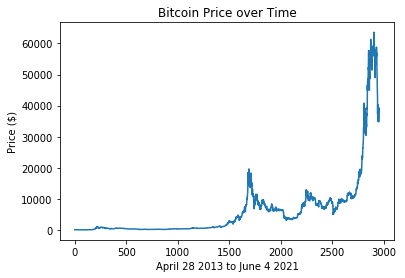

In [6]:
# using indices as dates
x =BTC.index
b_price=BTC.price
x_label = 'April 28 2013 to June 4 2021'

plt.plot(x, b_price)
plt.xlabel(x_label)
plt.ylabel('Price ($)')
plt.title('Bitcoin Price over Time')

Text(0.5, 1.0, 'Bitcoin Market Cap over Time')

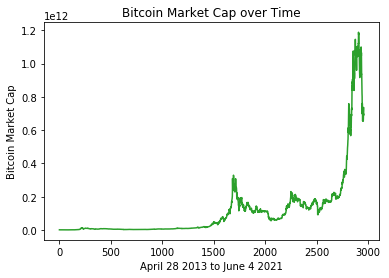

In [7]:
b_cap= BTC.market_cap

plt.plot(x, b_cap, 'tab:green')
plt.xlabel(x_label)
plt.ylabel('Bitcoin Market Cap')
plt.title('Bitcoin Market Cap over Time')

Text(0.5, 1.0, 'Bitcoin Total Volume over Time')

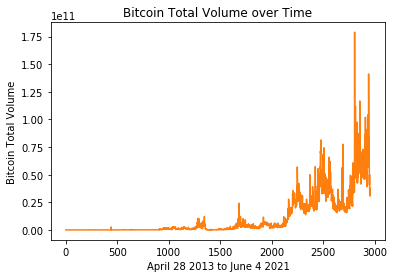

In [8]:
b_volume = BTC.total_volume

plt.plot(x, b_volume, 'tab:orange')
plt.xlabel(x_label)
plt.ylabel('Bitcoin Total Volume')
plt.title('Bitcoin Total Volume over Time')

## Doge Dataset

In [9]:
DOGE = pd.read_csv (r'doge-usd-max.csv')
DOGE.head()

,snapped_at,price,market_cap,total_volume
0,2013-12-15 00:00:00 UTC,0.000559,3488670.0,0.0
1,2013-12-17 00:00:00 UTC,0.000218,1619159.0,0.0
2,2013-12-18 00:00:00 UTC,0.000268,2191987.0,0.0
3,2013-12-19 00:00:00 UTC,0.000475,4299422.0,0.0
4,2013-12-20 00:00:00 UTC,0.000989,9866232.0,0.0


In [10]:
# rename snapped_at to date
DOGE = DOGE.rename(columns={'snapped_at':'date'})
# strip string in snapped_at to remove time
DOGE['date'] = DOGE['date'].str.split(' ', expand=True)[0]
DOGE.head()

,date,price,market_cap,total_volume
0,2013-12-15,0.000559,3488670.0,0.0
1,2013-12-17,0.000218,1619159.0,0.0
2,2013-12-18,0.000268,2191987.0,0.0
3,2013-12-19,0.000475,4299422.0,0.0
4,2013-12-20,0.000989,9866232.0,0.0


In [11]:
DOGE.tail()

,date,price,market_cap,total_volume
2721,2021-05-31,0.301429,3.912353e+10,2.927396e+09
2722,2021-06-01,0.326531,4.239246e+10,2.987099e+09
2723,2021-06-02,0.373237,4.846133e+10,6.733328e+09
2724,2021-06-03,0.427388,5.545456e+10,1.239040e+10
2725,2021-06-04,0.398007,5.168848e+10,7.531474e+09


Text(0.5, 1.0, 'DOGE Price over Time')

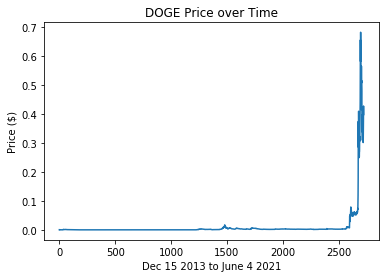

In [12]:
# using indices in replace of dates
x2=DOGE.index
x2_label = 'Dec 15 2013 to June 4 2021'

plt.plot(x2,DOGE.price)
plt.xlabel(x2_label)
plt.ylabel('Price ($)')
plt.title('DOGE Price over Time')

#### Since there hasn't been much fluctuation in Doge for the first 2500 observation points, we are only interested in observations that show more active transactions, such as when the price is greater than a certain threshold.

In [13]:
threshold = 0.079
doge = DOGE.loc[DOGE.price >= threshold]
doge

,date,price,market_cap,total_volume
2609,2021-02-08,0.079085,1.027107e+10,1.379313e+10
2610,2021-02-09,0.079227,1.016402e+10,1.082381e+10
2674,2021-04-14,0.093779,1.211326e+10,7.372509e+09
2675,2021-04-15,0.120172,1.570112e+10,1.959565e+10
2676,2021-04-16,0.179862,2.278076e+10,1.767546e+10
2677,2021-04-17,0.374160,4.876721e+10,5.096065e+10
2678,2021-04-18,0.285109,3.748358e+10,3.030142e+10
2679,2021-04-19,0.320030,4.136006e+10,2.375355e+10
2680,2021-04-20,0.409410,5.308695e+10,3.084787e+10
2681,2021-04-21,0.325695,4.306410e+10,2.825632e+10


In [14]:
doge = doge.reset_index()
doge

,index,date,price,market_cap,total_volume
0,2609,2021-02-08,0.079085,1.027107e+10,1.379313e+10
1,2610,2021-02-09,0.079227,1.016402e+10,1.082381e+10
2,2674,2021-04-14,0.093779,1.211326e+10,7.372509e+09
3,2675,2021-04-15,0.120172,1.570112e+10,1.959565e+10
4,2676,2021-04-16,0.179862,2.278076e+10,1.767546e+10
5,2677,2021-04-17,0.374160,4.876721e+10,5.096065e+10
6,2678,2021-04-18,0.285109,3.748358e+10,3.030142e+10
7,2679,2021-04-19,0.320030,4.136006e+10,2.375355e+10
8,2680,2021-04-20,0.409410,5.308695e+10,3.084787e+10
9,2681,2021-04-21,0.325695,4.306410e+10,2.825632e+10


In [15]:
start = doge.date.iloc[0]
end = doge.date.iloc[-1]

In [16]:
doge.tail()

,index,date,price,market_cap,total_volume
49,2721,2021-05-31,0.301429,3.912353e+10,2.927396e+09
50,2722,2021-06-01,0.326531,4.239246e+10,2.987099e+09
51,2723,2021-06-02,0.373237,4.846133e+10,6.733328e+09
52,2724,2021-06-03,0.427388,5.545456e+10,1.239040e+10
53,2725,2021-06-04,0.398007,5.168848e+10,7.531474e+09


Text(0.5, 1.0, 'DOGE Price over Time')

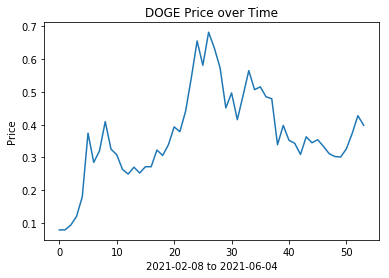

In [17]:
doge_x2 = doge.index
d_price = doge.price

x2_label = start + ' to ' + end
plt.plot(doge_x2, d_price)
plt.xlabel(x2_label)
plt.ylabel('Price')
plt.title('DOGE Price over Time')

Text(0.5, 1.0, 'DOGE Market Cap over Time')

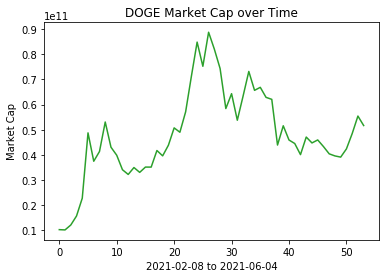

In [18]:
d_cap = doge.market_cap

plt.plot(doge_x2, d_cap, 'tab:green')
plt.xlabel(x2_label)
plt.ylabel('Market Cap')
plt.title('DOGE Market Cap over Time')

Text(0.5, 1.0, 'DOGE Total Volume over Time')

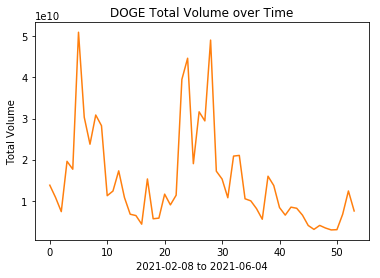

In [19]:
d_volume=doge.total_volume

plt.plot(doge_x2, d_volume,'tab:orange')
plt.xlabel(x2_label)
plt.ylabel('Total Volume')
plt.title('DOGE Total Volume over Time')

# Model Selection: Multiple Polynomial Regression
Goal: select the model with the lowest cross-validated test MSE (mean squared error) to balance bias/variance and prevent overfitting

> $CV_k = \frac{1}{k} \sum_{i=1}^{k} MSE_i$

## Leave-one-out cross-validation (LOOCV)
- Choose 1 data point to use for validation/test & train remaining (n-1) observations
- Repeat n times using a different observation point as the test each time
- Same as K-Fold when k=n

In [20]:
# use sklearn for k-fold (and loocv) cross-validation
from sklearn.model_selection import KFold

In [63]:
# cross-validation method returns the test MSE and the polynomial model with the lowest test MSE
def cv(deg, k, dataset):
    kf = KFold(n_splits = k, shuffle = True, random_state = 0)
    mse_train_loocv = []
    mse_test_loocv = []
    models = []

    for train_i, val_i in kf.split(dataset):

        # y value used to fit polynomial model
        y_train = dataset.iloc[train_i,:].price
        y_test = dataset.price[val_i]
        
        # step 1: train model with baseline model
        model = poly1d(polyfit(train_i, y_train, deg = deg))
        models.append(model)

        # step 2: fit test observation point to polynomial 
        yhat_train = model(train_i)
        yhat_test = model(val_i)

        # step 3: append MSEs`
        diffsq_train = (y_train - yhat_train)**2
        diffsq_test = (y_test - yhat_test)**2
        
        mse_train_loocv.append(np.mean(diffsq_train))
        mse_test_loocv.append(np.mean(diffsq_test))
        
    # find the index with the lowest mse
    min_index = np.argmin(mse_train_loocv)
    
    return mse_train_loocv[min_index], mse_test_loocv[np.argmin(mse_test_loocv)], models[min_index]

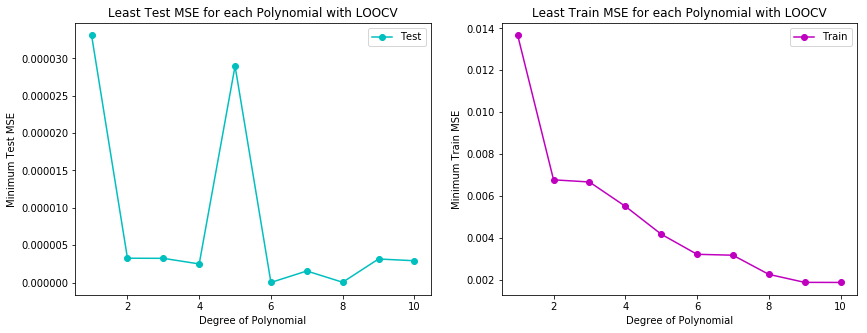

In [120]:
# create polynomial model for a range of degrees from 1 to 10
loocv_train_mse = []
model_min = []
loocv_test_mse = []
for deg in range(1, 11):
    # k = n for loocv
    k = len(doge)
    mse_train, mse_test, model = cv(deg, k, doge)
    
    loocv_train_mse.append(mse_train)
    model_min.append(model)
    loocv_test_mse.append(mse_test)
    
fig, axs = plt.subplots(1,2, figsize=(14,5))
    
axs[0].plot(range(1,11), loocv_test_mse, '-co', label='Test')
axs[0].set_xlabel("Degree of Polynomial")
axs[0].set_ylabel("Minimum Test MSE")
axs[0].set_title('Least Test MSE for each Polynomial with LOOCV')
axs[0].legend()

axs[1].plot(range(1,11), loocv_train_mse, '-mo', label='Train')
axs[1].set_xlabel("Degree of Polynomial")
axs[1].set_ylabel("Minimum Train MSE")
axs[1].set_title('Least Train MSE for each Polynomial with LOOCV')
axs[1].legend()

Polynomial degree with the lowest test MSE: 9


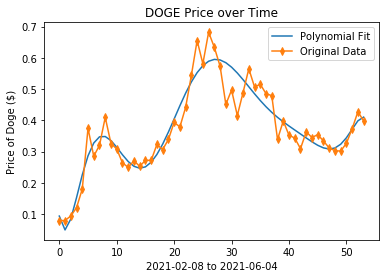

In [79]:
# find index of lowest mse out of all the polynomial degrees
index = np.argmin(test_mse_min)

# find the polynomial model with the lowest test mse 
loocv_model = model_min[index]
print("Polynomial degree with the lowest test MSE: %d" % index)

# price of doge from the best polynomial degree model
y_model = loocv_model(range(len(doge)))

plt.plot(doge_x2, y_model, label="Polynomial Fit")
plt.xlabel(x2_label)
plt.ylabel('Price of Doge ($)')

# plot original price of Doge
plt.plot(doge_x2, d_price, '-d', markersize=5, label="Original Data")
plt.xlabel(x2_label)
plt.title('DOGE Price over Time')

plt.legend()

In [24]:
# lowest test mse and best polynomial model with loocv
mse_min[index], loocv_model

(0.016555297661342182, poly1d([0.00341617, 0.27366267]))

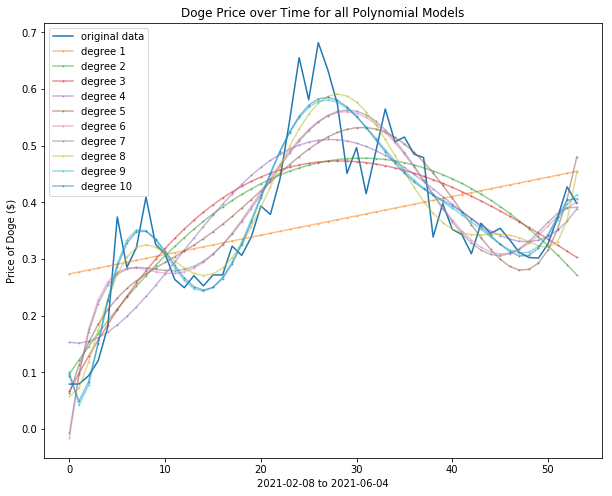

In [25]:
# plot models of all the polynomial degrees
plt.figure(figsize=(10,8))
plt.plot(doge_x2, d_price, label="original data")
plt.xlabel(x2_label)
plt.ylabel('Price of Doge ($)')
plt.title('Doge Price over Time for all Polynomial Models')

for x in range(len(model_min)):
    m = model_min[x]
    y_doge = m(range(len(doge)))
    plt.plot(doge_x2, y_doge, '-o', markersize=1, label='degree %s' % (x+1), alpha=0.5)
    
plt.legend()

## k-Fold cross-validation
- Randomly assign each data point to one of k data subsets/folds
- Choose one fold as test set & train remaining (k-1) folds
- Same as LOOCV when k=n

In [26]:
for k in range(1,21):
    cv()

TypeError: cv() missing 3 required positional arguments: 'deg', 'k', and 'dataset'

# Model Estimation
* can get confidence intervals and show standard error bars